# Function to Compare Climate Model and Observational Data
**Description:** Script that takes in datasets from climate models and observations and compares them to determine suitability for different applications.  
**Input Data:** Climate Model and Observational Data (1 dataset each)  
**Output Data:** Summary Statistics, T-test statistcs, F-test statistics, map of differences, graphs of pdfs  
**Author:** Emma Perkins, David Bailey, Teagan King  
**Date:** June 2022, updated July 2023

## Mount Google Drive and Install/Import Relevant Packages

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
#install packages not already available in google colab (-q flag suppresses most of the output as the packages are installing)
!pip install -q cartopy
!pip install -q xarray[complete]

In [3]:
# import necessary packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy.stats as stats
from astropy.io import ascii
from astropy.table import Table
import os
import cftime
import pandas as pd

In [4]:
#import supporting functions from SupportingFunctions.ipynb
%run /content/drive/Shareddrives/NNA-CPAD-Tutorial/ColabNotebooks/AdvancedTutorials/SupportingFunctions.ipynb

### Load Data
**These data should already be reformated into a single file each with a single (same) variable of interest and same timestep size using the Script4DataExtractionAndPrep.ipynb**

In [5]:
#SAVE_DIR = ''' DIRECTORY FOR SAVING YOUR RESULTS ''' #should be something like /content/drive/MyDrive/...
SAVE_DIR = '/content/drive/MyDrive'

path = '/content/drive/Shareddrives/NNA-CPAD-Tutorial/Data/ComparisonData/MRB_1990_2010' #path to where data is stored
var_name = 'tas' # UPDATE TO THE VARIABLE YOU WANT TO ANALYZE: eg, 'tas', 'ts', or 'pr'

obs_name = 'era5_{}.nc'.format(var_name) # name of observational data file
clim_name = 'CESM2_historical_r1i1p1f1_{}.nc'.format(var_name) # name of climate model data file

clim_data = xr.open_dataset(os.path.join(path, clim_name))[var_name].rename('clim_data') #read in climate model data
obs_data = xr.open_dataarray(os.path.join(path, obs_name)).rename('obs_data') #read in observational data

# masking file
mask_file = xr.open_dataset('/content/drive/Shareddrives/NNA-CPAD-Tutorial/Data/domain.lnd.fv0.9x1.25_gx1v7.151020.nc')  # change to your masking file
mask = mask_file.mask

/usr/local/lib/python3.10/dist-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


### Run the Comparison

<ipython-input-4-48b42bd49c85>:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  clim_data['time'] = clim_data.indexes['time'].to_datetimeindex()


Temporal correction complete.
Spatial correction complete.
Ocean/Land masking complete.


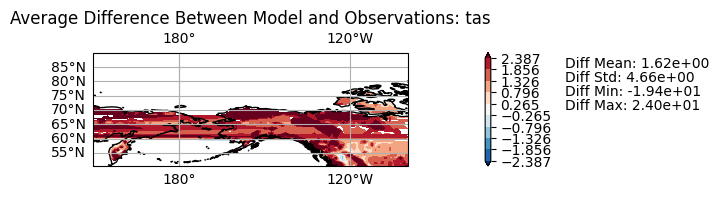

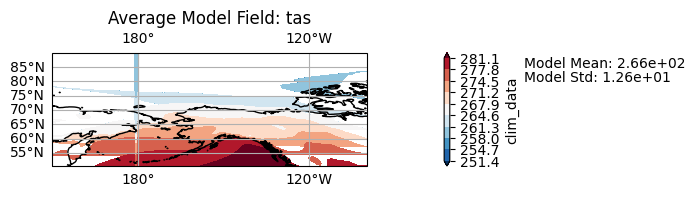

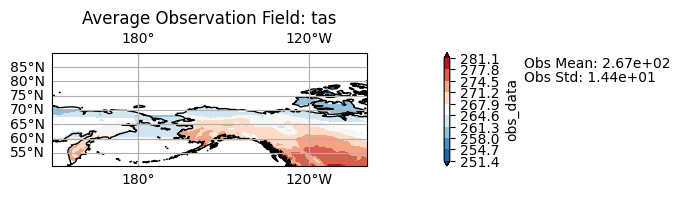

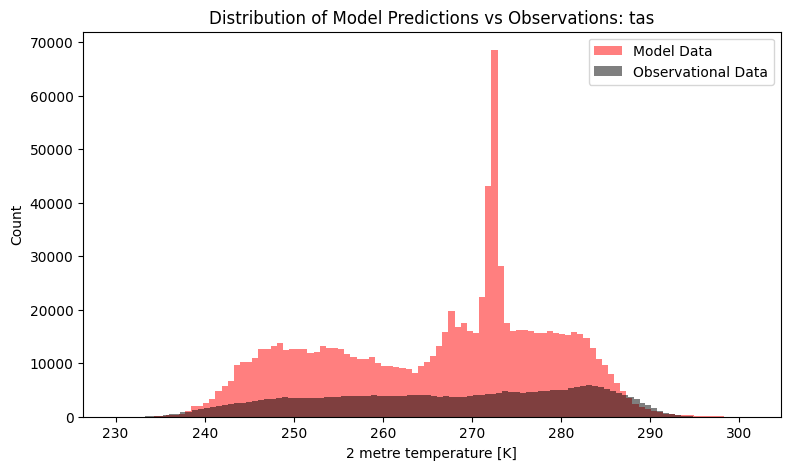

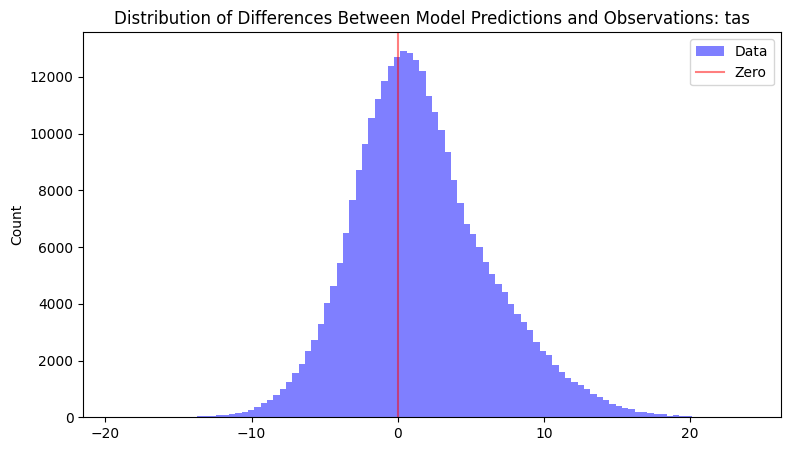

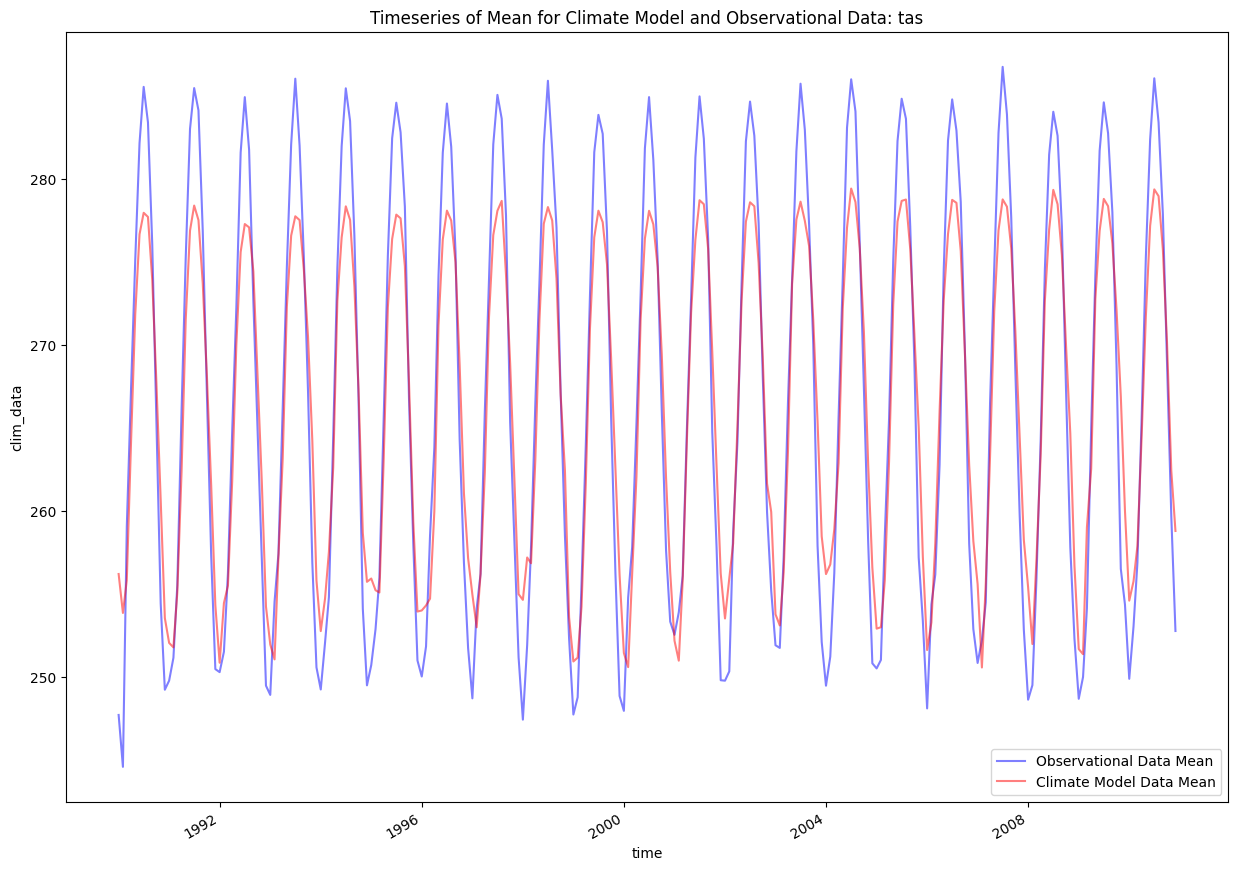

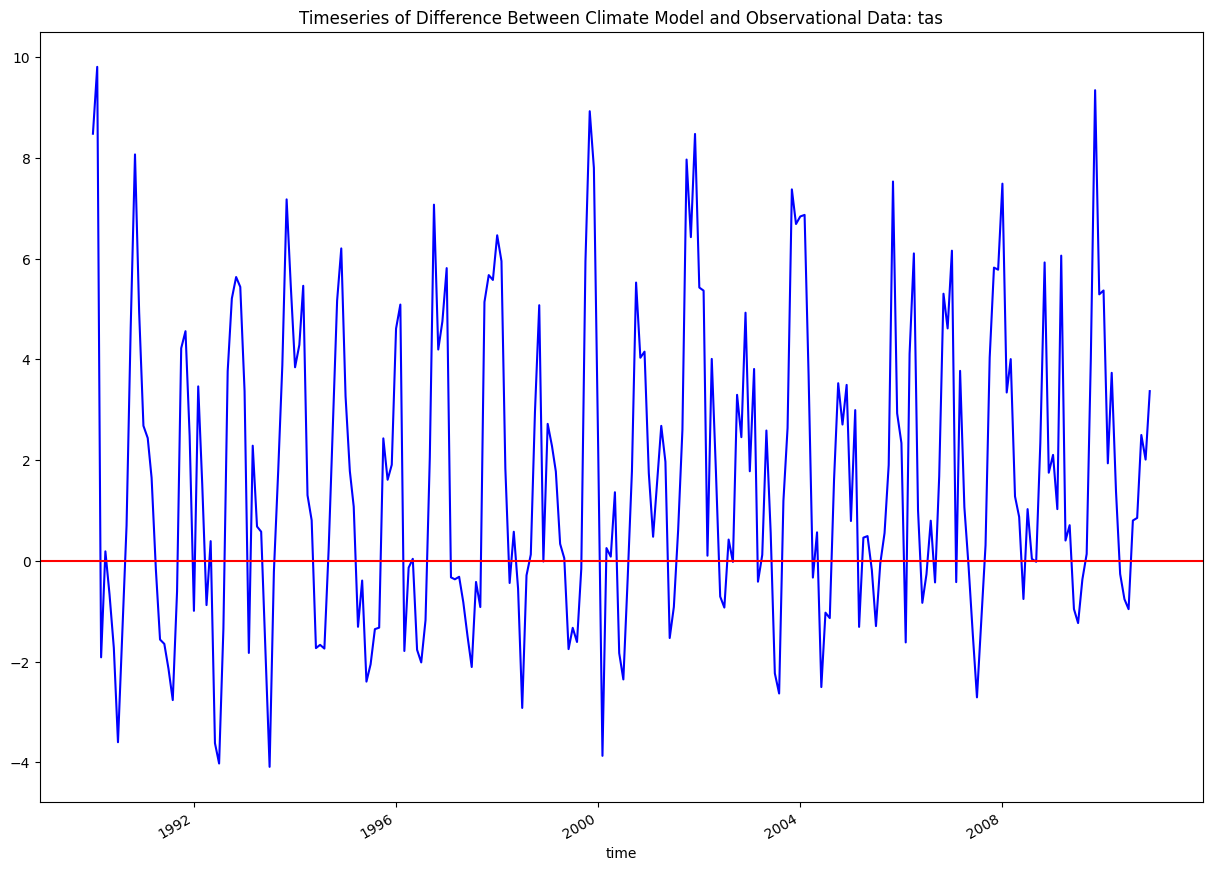

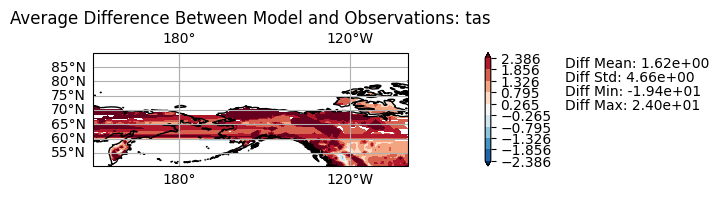

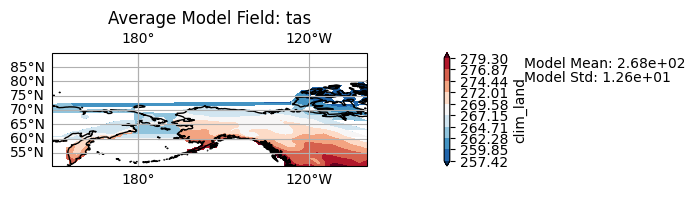

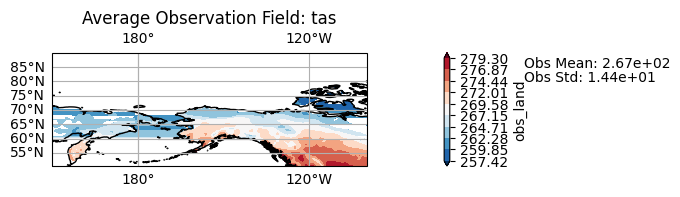

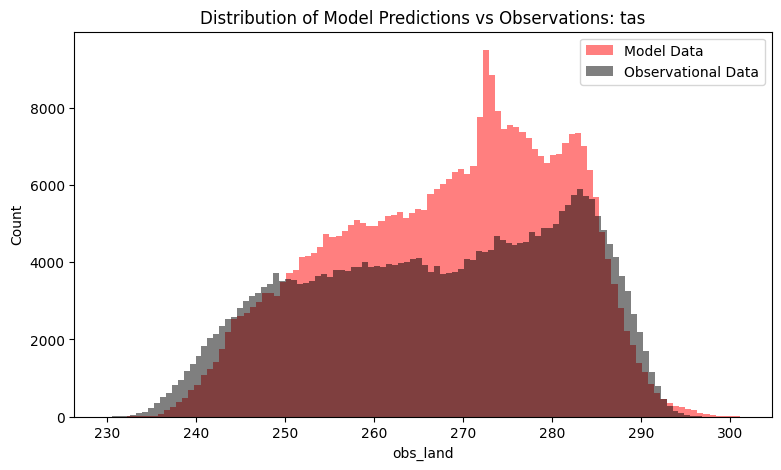

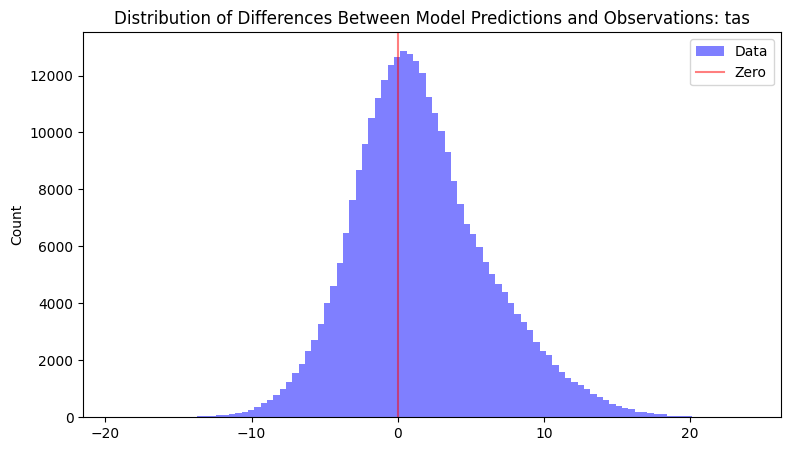

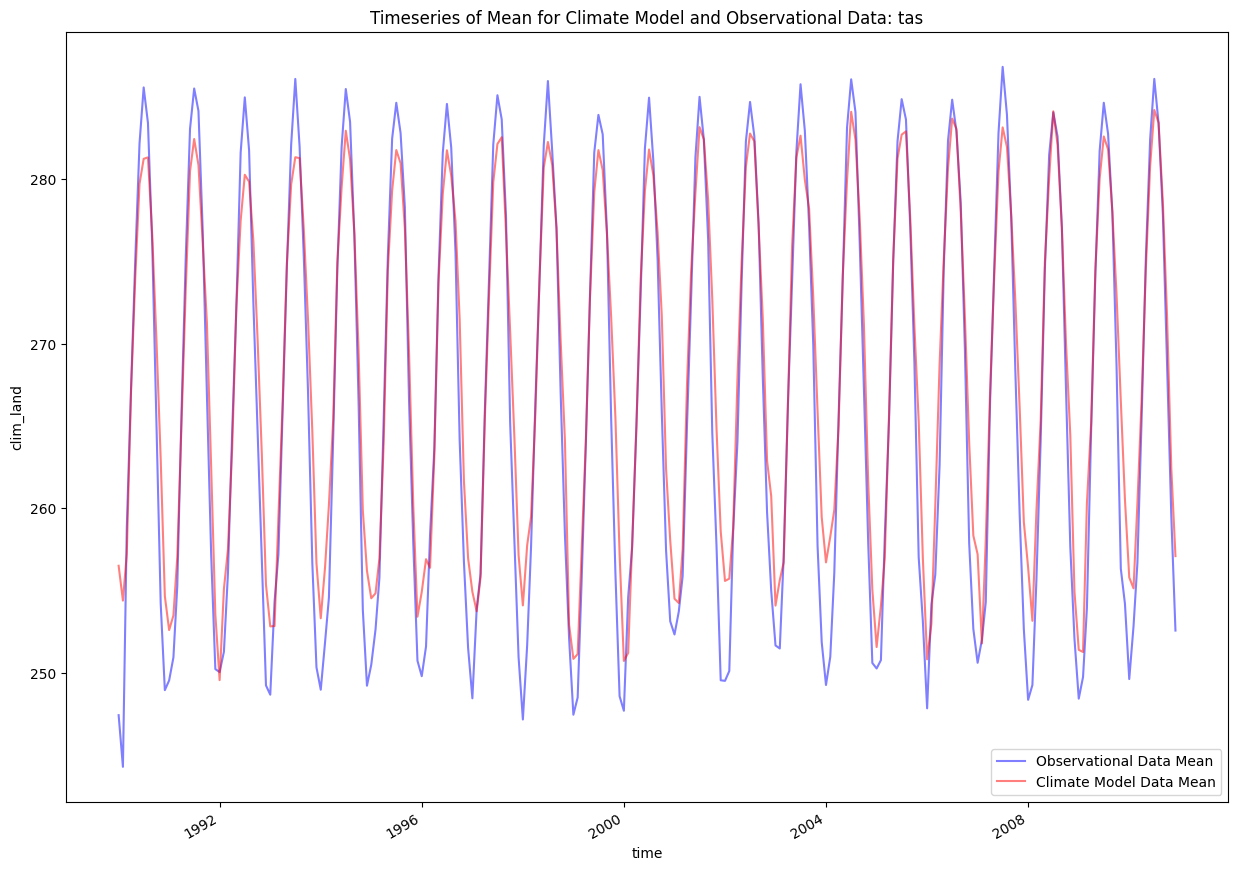

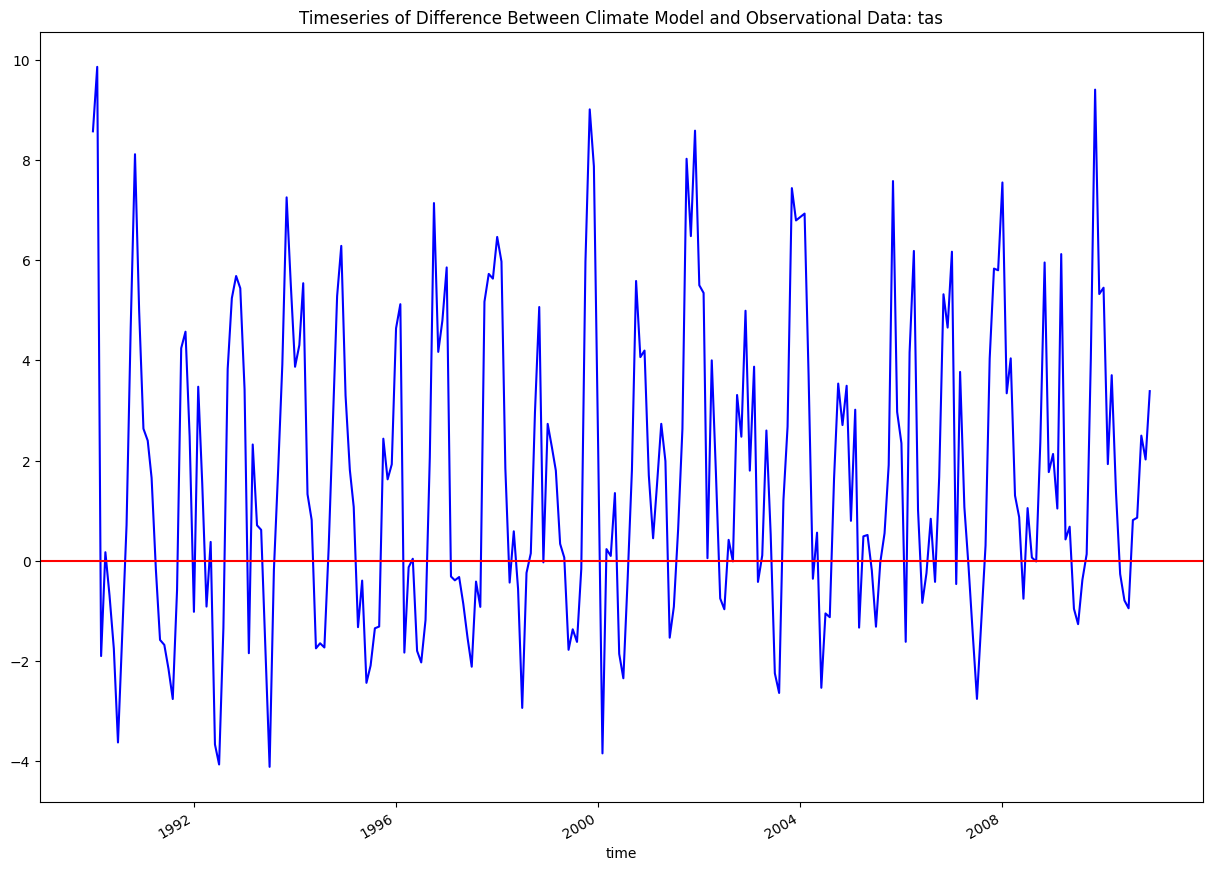

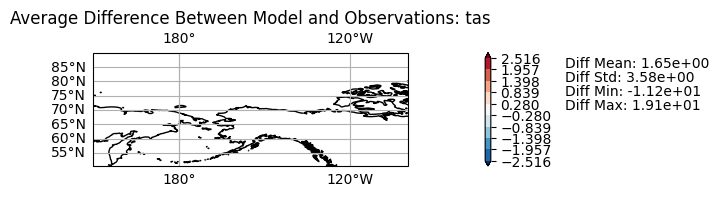

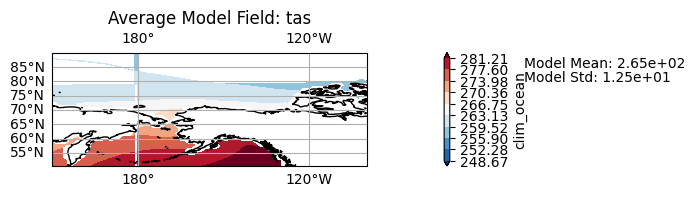

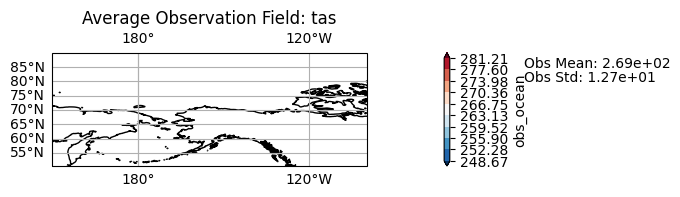

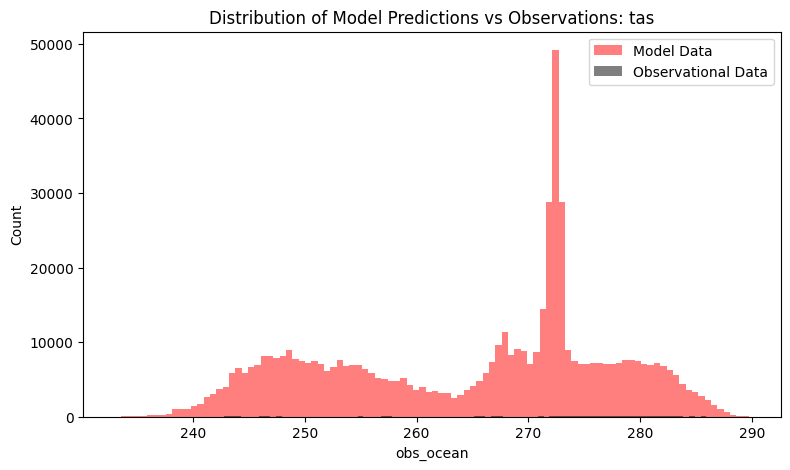

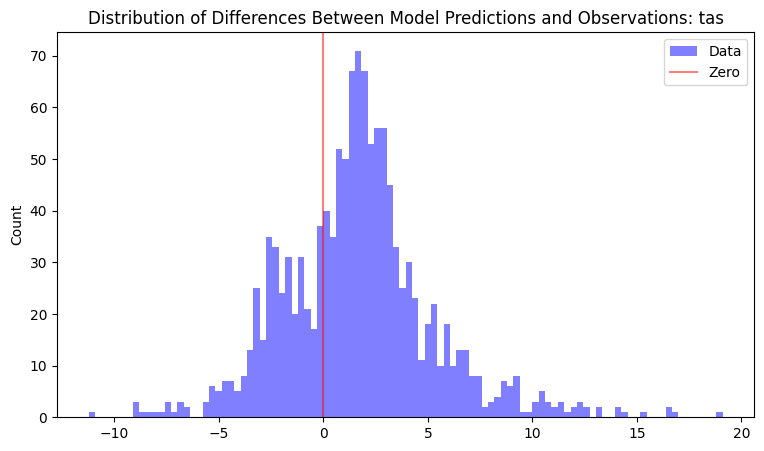

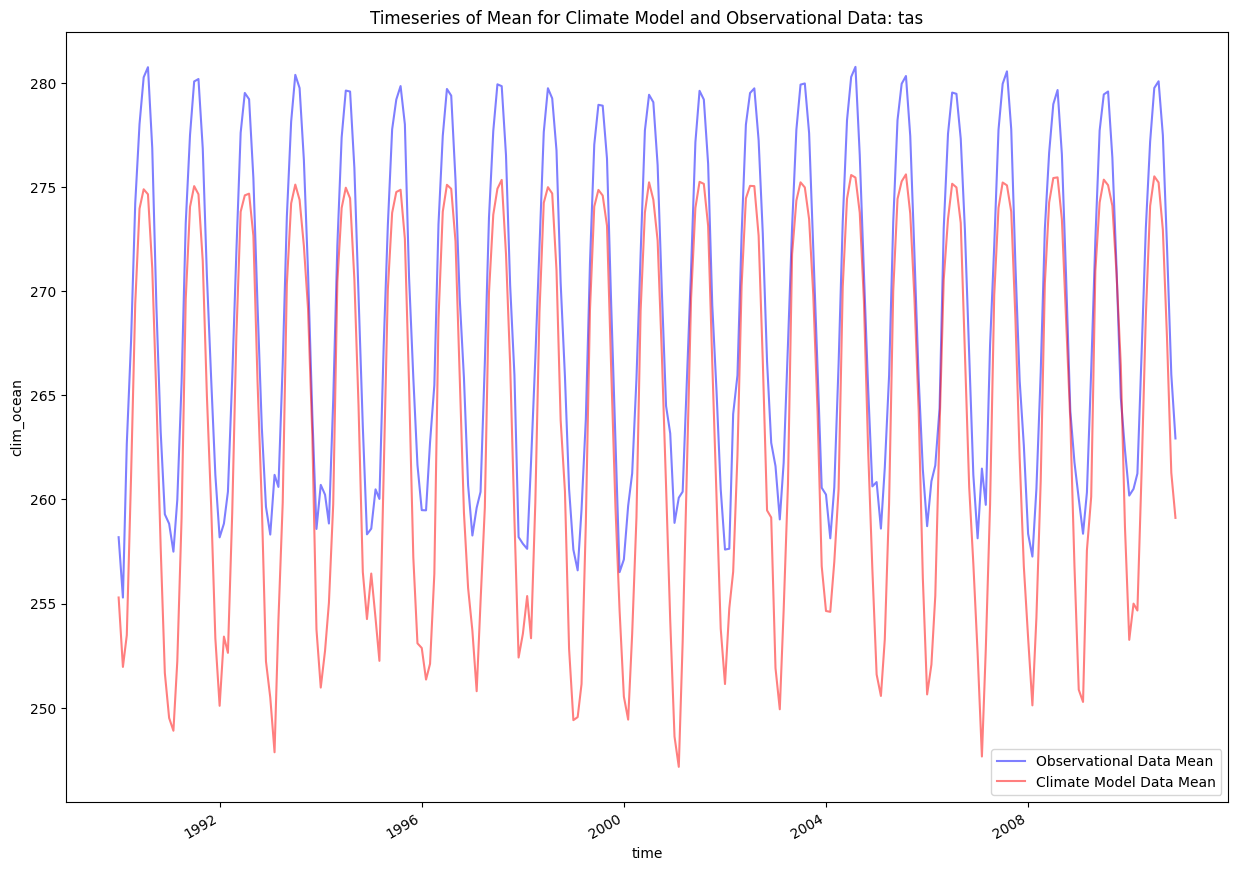

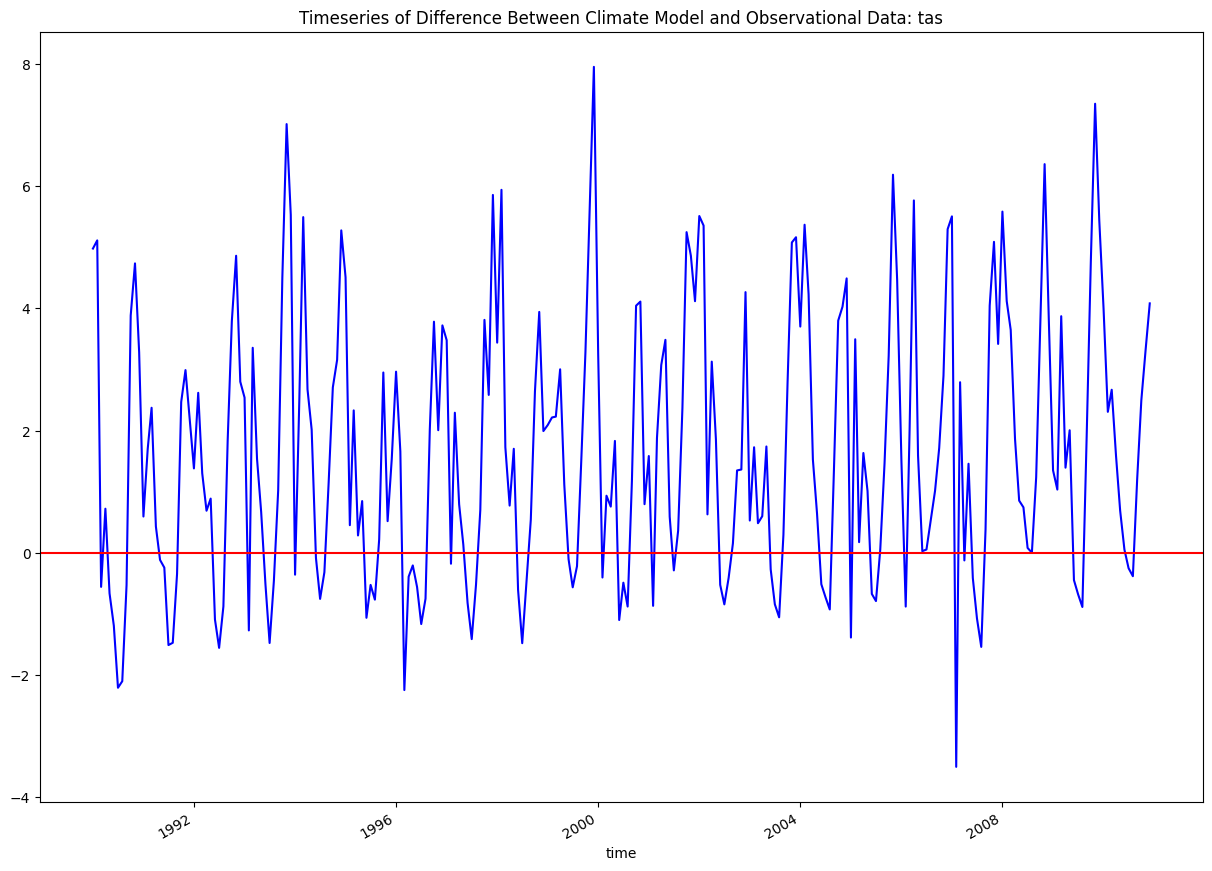

    statistic     Full stats Land stats Ocean stats
----------------- ---------- ---------- -----------
         obs_mean   2.67e+02   2.67e+02    2.69e+02
        obs_stdev   1.44e+01   1.44e+01    1.27e+01
          obs_min   2.30e+02   2.30e+02    2.36e+02
          obs_max   2.97e+02   2.97e+02    2.88e+02
     obs_var_full   2.08e+02   2.08e+02    1.61e+02
    obs_var_space   2.72e+01   2.69e+01    7.78e+01
 obs_var_time_avg   1.81e+02   1.81e+02    8.29e+01
        clim_mean   2.66e+02   2.68e+02    2.65e+02
       clim_stdev   1.26e+01   1.26e+01    1.25e+01
         clim_min   2.32e+02   2.32e+02    2.33e+02
         clim_max   3.01e+02   3.01e+02    2.90e+02
    clim_var_full   1.60e+02   1.60e+02    1.56e+02
   clim_var_space   5.51e+01   2.99e+01    6.62e+01
clim_var_time_avg   1.05e+02   1.30e+02    8.95e+01
         dif_mean   1.62e+00   1.62e+00    1.65e+00
        dif_stdev   4.66e+00   4.66e+00    3.58e+00
          dif_min  -1.94e+01  -1.94e+01   -1.12e+01
          di

In [6]:
%%time

full_stats = mod_compare(obs_data, clim_data, SAVE_DIR)